In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

In [82]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/18mzp6f9xZm0J4rfoAuJ_Xu-gzVDjjkc1oMTMW10QGEQ/gviz/tq?tqx=out:csv&sheet=Flight")

In [83]:
data.head()

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
0,Kevin,Som,29.0,20.0,A,U,8,On,L,5
1,Kevin,kevin,23.0,16.0,B,U,8,On,L,5
2,Kevin,RR,NaN,18.0,A,L,10,On,R,6
3,Priya,Nithya,27.0,20.0,A,U,10,On,R,4
4,Priya,Priya,29.5,17.5,B,U,5,Off,R,8


In [84]:
data.isnull().sum()

Person              0
Item_Identifier     0
Length             17
Breadth             0
PaperQuality        8
Angle               4
Foldings            0
Windspeed           0
Dominanthand        0
Distance            0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x21ed27e3580>,
 'caps': [<matplotlib.lines.Line2D at 0x21ed27e3ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ed27e3220>],
 'medians': [<matplotlib.lines.Line2D at 0x21ed27ec400>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ed27ec790>],
 'means': []}

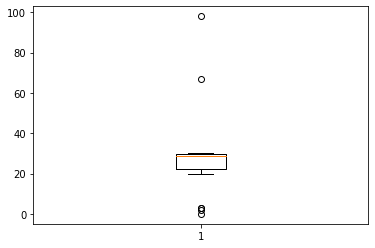

In [85]:
plt.boxplot(data.Length.dropna())

In [86]:
data.Length.fillna(data.Length.median(),inplace=True)

In [87]:
q3 = data.Length.quantile(0.75)
q3

29.5

In [88]:
q1 = data.Length.quantile(0.25)
q1

24.5

In [89]:
IQR = q3 - q1
IQR

5.0

In [90]:
UE = q3 + (1.5 * IQR)
UE

37.0

In [91]:
LE = q1 - (1.5 * IQR)
LE

17.0

In [92]:
data1 = data[(data.Length <= UE) & (data.Length >= LE)]

{'whiskers': [<matplotlib.lines.Line2D at 0x21ed2840c10>,
 'caps': [<matplotlib.lines.Line2D at 0x21ed284f370>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ed2840910>],
 'medians': [<matplotlib.lines.Line2D at 0x21ed284fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ed284fe20>],
 'means': []}

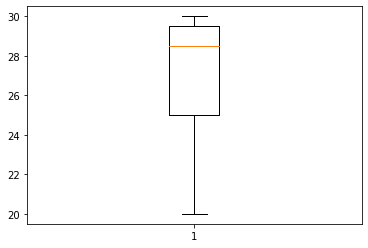

In [93]:
plt.boxplot(data1.Length)

In [94]:
data.Angle.fillna(data.Angle.mode().max(),inplace=True)

In [95]:
data.PaperQuality.fillna("others",inplace=True)

In [96]:
y = data.Distance
x = data.iloc[0:,[2,3,4,5,6,7,8]]

In [97]:
x.head()

,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand
0,29.0,20.0,A,U,8,On,L
1,23.0,16.0,B,U,8,On,L
2,28.5,18.0,A,L,10,On,R
3,27.0,20.0,A,U,10,On,R
4,29.5,17.5,B,U,5,Off,R


In [98]:
dummy = pd.get_dummies(x)

In [99]:
scaler = MinMaxScaler()

In [100]:
scaler.fit(dummy)

MinMaxScaler()

In [101]:
d = scaler.transform(dummy)

In [102]:
df = pd.DataFrame(d)

In [103]:
trainx,testx = train_test_split(df,test_size = 0.2)
trainy,testy = train_test_split(y,test_size = 0.2)

<h1 style = "color:green";>Random Forest Regression</h1>

In [104]:
RF = RandomForestRegressor(max_depth=2, random_state=0)

In [105]:
RF.fit(trainx,trainy)

RandomForestRegressor(max_depth=2, random_state=0)

In [106]:
RF.predict(testx)

array([6.53169763, 6.38181542, 6.77738363, 5.68462504, 5.21874361,
       6.53169763, 5.68462504, 5.9982725 , 6.37776364, 5.80913824,
       5.93544701, 6.16483665, 6.53169763, 5.30486856, 6.79969506,
       6.16483665, 5.99037322, 5.93544701])

In [107]:
RF.score(testx,testy)

-0.08476551226026863

<h1 style = "color:red";> Gradient Boosting</h1>

In [108]:
GB = GradientBoostingRegressor(random_state=0)

In [109]:
GB.fit(trainx,trainy)

GradientBoostingRegressor(random_state=0)

In [110]:
GB.predict(trainx)

array([5.03582194, 5.46049909, 6.9612601 , 4.00648994, 5.62374095,
       4.82221333, 6.44783673, 5.13875783, 4.82221333, 7.2973027 ,
       5.8605353 , 8.26435975, 6.9612601 , 4.05501994, 5.40844034,
       4.05501994, 5.40844034, 7.2973027 , 5.38973431, 4.08614748,
       3.02627162, 5.03582194, 6.18605144, 7.71412738, 6.9612601 ,
       6.9612601 , 6.2531955 , 6.59313472, 8.12259794, 6.2531955 ,
       7.33341251, 5.22157164, 5.88691599, 6.9612601 , 5.03582194,
       6.18605144, 5.89763289, 7.71412738, 6.44783673, 7.12340898,
       5.8605353 , 6.59313472, 7.2973027 , 7.33341251, 6.62809749,
       6.9612601 , 6.18605144, 5.40844034, 5.40844034, 5.46049909,
       4.82221333, 5.78520517, 6.59313472, 6.9612601 , 8.26435975,
       4.59312035, 4.59312035, 6.44783673, 7.71412738, 6.2531955 ,
       5.03582194, 9.69607548, 7.2973027 , 6.76120203, 5.80823355,
       5.62374095, 6.2531955 , 6.44783673, 6.18605144, 5.40844034])

In [111]:
GB.score(testx,testy)

-0.296739563782376

<h1 style = "color:yellow";>Adab Boosting</h1>

In [112]:
AB = GradientBoostingRegressor(random_state=0)

In [113]:
AB.fit(trainx,trainy)

GradientBoostingRegressor(random_state=0)

In [114]:
AB.predict(testx)

array([5.38973431, 6.59313472, 7.71412738, 5.46049909, 4.82221333,
       5.38973431, 5.46049909, 6.2531955 , 6.9612601 , 5.39955715,
       6.18605144, 5.89763289, 5.38973431, 3.74078231, 8.26435975,
       5.89763289, 4.59312035, 6.18605144])

In [115]:
AB.score(testx,testy)

-0.296739563782376

<h1 style = "color:grey";>Decision Tree</h1>

In [116]:
DT = DecisionTreeRegressor(random_state=0)

In [117]:
DT.fit(trainx,trainy)

DecisionTreeRegressor(random_state=0)

In [118]:
DT.predict(testx)

array([5.        , 6.66666667, 8.        , 5.5       , 5.        ,
       5.        , 5.5       , 6.        , 7.        , 3.        ,
       6.5       , 6.        , 5.        , 3.        , 8.5       ,
       6.        , 4.        , 6.5       ])

In [119]:
DT.score(testx,testy)

-0.49236641221374056

<h1 style = "color:blue";>Linear Regression</h1>

In [120]:
 LR = LinearRegression()

In [121]:
LR.fit(trainx,trainy)

LinearRegression()

In [122]:
LR.predict(testx)

array([7.06376195, 6.01504645, 7.00509136, 6.07546379, 5.66923262,
       7.06376195, 6.07546379, 5.98807748, 5.75667758, 6.48962729,
       5.67290892, 6.11968226, 7.06376195, 5.18293919, 7.07610835,
       6.11968226, 6.09578859, 5.67290892])

In [123]:
LR.score(testx,testy)

-0.08673060682265121

In [124]:
Canfly = data.Distance

In [125]:
data['Canfly'] = Canfly

In [139]:
fdxdata.Canfly = data.Canfly.replace(to_replace = data[data.Canfly>=5],value="Yes")

ValueError: Series.replace cannot use dict-like to_replace and non-None value

In [137]:
data.isnull().sum()

Person             0
Item_Identifier    0
Length             0
Breadth            0
PaperQuality       0
Angle              0
Foldings           0
Windspeed          0
Dominanthand       0
Distance           0
Canfly             0
dtype: int64

<h1>DecisionTree Classifier</h1>

In [48]:
CT = DecisionTreeClassifier(random_state=0).fit(trainx,trainy)

In [49]:
CT.score(testx,testy)

0.1111111111111111

In [50]:
CT.predict(testx)

array([7, 6, 4, 4, 5, 4, 4, 5, 7, 6, 7, 1, 4, 5, 6, 4, 8, 6], dtype=int64)

In [138]:
data.Canfly

0     5
1     5
2     6
3     4
4     8
     ..
83    7
84    5
85    4
86    5
87    7
Name: Canfly, Length: 88, dtype: int64